In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from math import radians, cos, sin, asin, sqrt
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency

In [260]:
df_training_data = pd.read_csv(r'training_data.csv')

In [261]:
df_training_Target_data = pd.read_csv(r'training_set_labels.csv')

In [262]:
df_training_Target_data.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [263]:
df_training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [264]:
# Merge both DataFrames on the 'ID' column
df = pd.merge(df_training_data, df_training_Target_data, on='id')


Dataset Dimensions:
Number of Rows: 59400
Number of Columns: 41


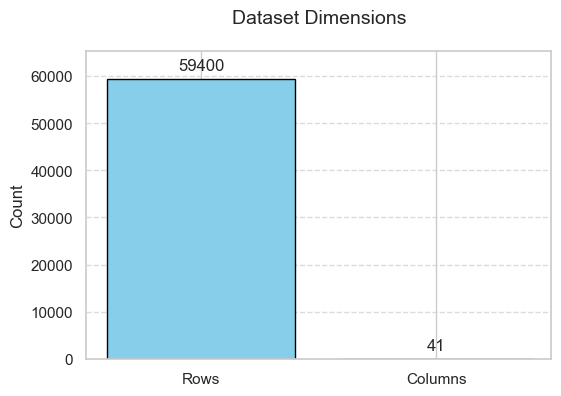

In [265]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get the number of rows and columns
num_rows, num_cols = df.shape

# Print for confirmation
print(f"Dataset Dimensions:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")

# Step 2: Visualize using a bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Data for the bar plot
labels = ['Rows', 'Columns']
counts = [num_rows, num_cols]

# Plot bars
bars = ax.bar(labels, counts, color=['skyblue', 'lightcoral'], edgecolor='black')

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02*max(counts), f'{int(height)}', 
            ha='center', va='bottom', fontsize=12)

# Set title and labels
plt.title('Dataset Dimensions', fontsize=14, pad=20)
plt.ylabel('Count', fontsize=12)
plt.ylim(0, max(counts) * 1.1)  # Add some space above the tallest bar

# Add grid for readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Save and show plot
#plt.savefig('dataset_dimensions.png', dpi=300, bbox_inches='tight')
plt.show()

In [266]:
#Data Preprocessing
#Clean data and handle missing values
#Engineer initial features
#Submit EDA report

In [267]:
# Checking null values
print(df.isnull().sum())

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [268]:
df['status_group'].value_counts()


status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [269]:
df['status_group'].value_counts(normalize=True) * 100

status_group
functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: proportion, dtype: float64

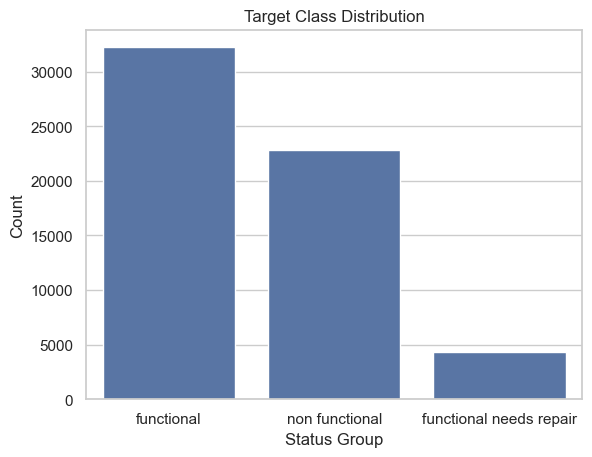

In [270]:
sns.countplot(x='status_group', data=df)
plt.title('Target Class Distribution')
plt.ylabel('Count')
plt.xlabel('Status Group')
#plt.savefig('Terget class distribution')
plt.show()

/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/30414320.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_col, y='Percentage', data=target_dist, ax=axes[idx], palette='viridis')
/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/30414320.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_col, y='Percentage', data=target_dist, ax=axes[idx], palette='viridis')
/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/30414320.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ta

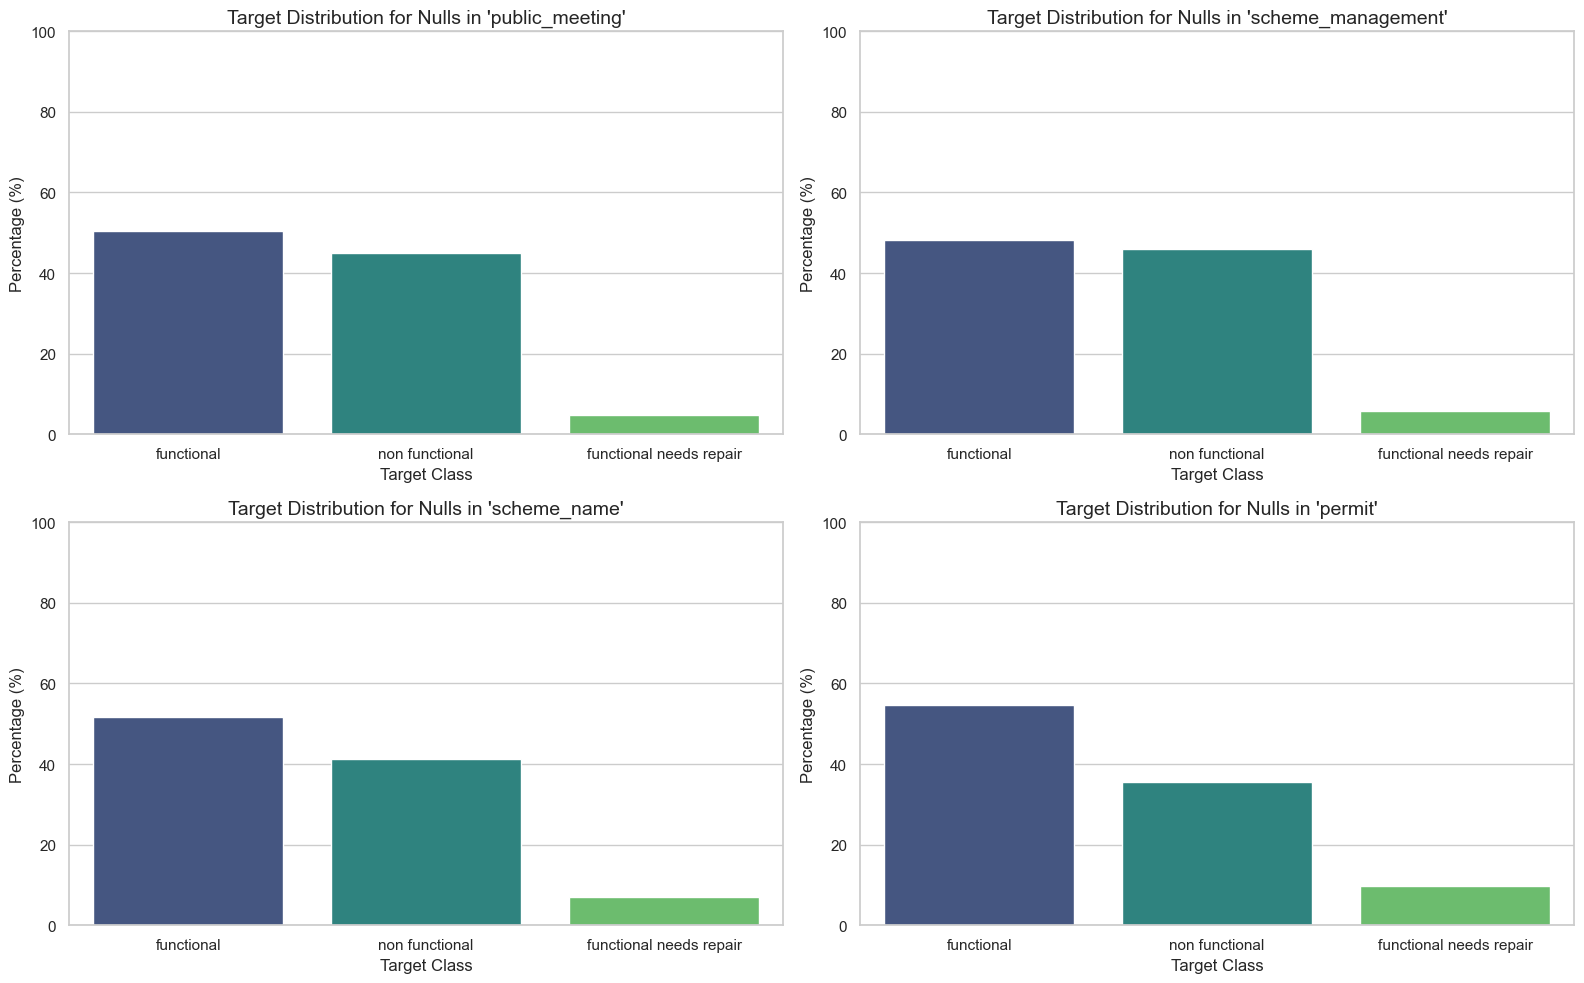

In [271]:


# Set plot style
sns.set(style='whitegrid')

# Columns with missing values to analyze
null_columns = ['public_meeting', 'scheme_management', 'scheme_name', 'permit']

# Target column name (update if needed)
target_col = 'status_group'

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Loop through each column with nulls
for idx, col in enumerate(null_columns):
    # Filter rows where this column is null
    null_df = df[df[col].isnull()]
    
    # Get value counts normalized (as percentage)
    target_dist = null_df[target_col].value_counts(normalize=True).mul(100).reset_index()
    target_dist.columns = [target_col, 'Percentage']
    
    # Bar plot
    sns.barplot(x=target_col, y='Percentage', data=target_dist, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f"Target Distribution for Nulls in '{col}'", fontsize=14)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].set_xlabel('Target Class')
    axes[idx].set_ylim(0, 100)

plt.tight_layout()
plt.show()


In [272]:
for idx, col in enumerate(null_columns):
    null_df = df[df[col].isnull()]
    
    target_dist = null_df[target_col].value_counts(normalize=True).mul(100).reset_index()
    target_dist.columns = [target_col, 'Percentage']
    
    print(f"\nPercentage distribution of '{target_col}' where '{col}' is NULL:")
    print(target_dist)
    
    # Plotting (same as before)
    sns.barplot(
        data=target_dist,
        x=target_col,
        y='Percentage',
        ax=axes[idx],
        palette='Set2'
    )
    axes[idx].set_title(f'{target_col} Distribution for NULL in "{col}"')
    axes[idx].set_ylim(0, 100)
    axes[idx].bar_label(axes[idx].containers[0], fmt='%.1f%%')



Percentage distribution of 'status_group' where 'public_meeting' is NULL:
              status_group  Percentage
0               functional   50.329934
1           non functional   44.991002
2  functional needs repair    4.679064

Percentage distribution of 'status_group' where 'scheme_management' is NULL:
              status_group  Percentage
0               functional   48.323878
1           non functional   45.925735
2  functional needs repair    5.750387

Percentage distribution of 'status_group' where 'scheme_name' is NULL:
              status_group  Percentage
0               functional   51.718153
1           non functional   41.221798
2  functional needs repair    7.060049

Percentage distribution of 'status_group' where 'permit' is NULL:
              status_group  Percentage
0               functional   54.744764
1           non functional   35.438482
2  functional needs repair    9.816754


/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/3196405942.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/3196405942.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/3196405942.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/3196405942.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/2229167609.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missing Percentage', y='Feature', data=missing_df, palette='Blues_d')


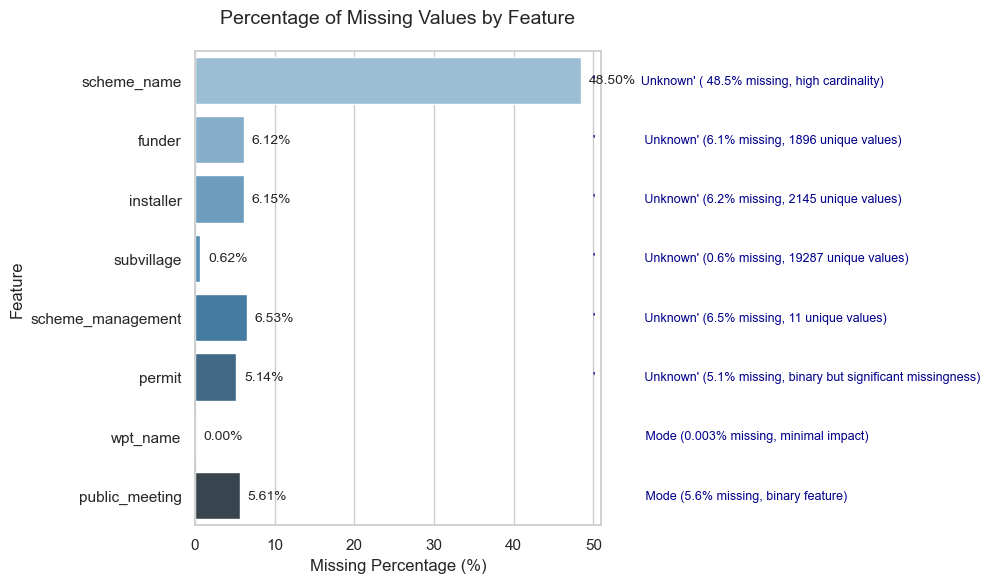

In [273]:
# Simulate DataFrame with missing value counts based on your data
missing_info = {
    'scheme_name': 28810,
    'funder': 3637,
    'installer': 3655,
    'subvillage': 371,
    'scheme_management': 3878,
    'permit': 3056,
    'wpt_name': 2,
    'public_meeting': 3334
}
total_rows = 59400  # From your dataset

# Calculate missing percentages
missing_df = pd.DataFrame({
    'Feature': missing_info.keys(),
    'Missing Count': missing_info.values(),
    'Missing Percentage': [count / total_rows * 100 for count in missing_info.values()]
})
# Imputation strategy for annotation
imputation_strategy = {
    'scheme_name': "'             Unknown' ( 48.5% missing, high cardinality)",
    'funder': "'              Unknown' (6.1% missing, 1896 unique values)",
    'installer': "'              Unknown' (6.2% missing, 2145 unique values)",
    'subvillage': "'              Unknown' (0.6% missing, 19287 unique values)",
    'scheme_management': "'              Unknown' (6.5% missing, 11 unique values)",
    'permit': "'              Unknown' (5.1% missing, binary but significant missingness)",
    'wpt_name': "               Mode (0.003% missing, minimal impact)",
    'public_meeting': "               Mode (5.6% missing, binary feature)"
}
# Plot 1: Bar Plot of Missing Value Percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Percentage', y='Feature', data=missing_df, palette='Blues_d')
plt.title('Percentage of Missing Values by Feature', fontsize=14, pad=20)
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Annotate bars with exact percentages and imputation strategy
for i, row in missing_df.iterrows():
    plt.text(row['Missing Percentage'] + 1, i, f"{row['Missing Percentage']:.2f}%", 
             va='center', fontsize=10)
    plt.text(50, i, imputation_strategy[row['Feature']], 
             va='center', fontsize=9, color='darkblue')

plt.tight_layout()
#plt.savefig('missing_values_barplot_final.png', dpi=300)  # Save for presentation
plt.show()

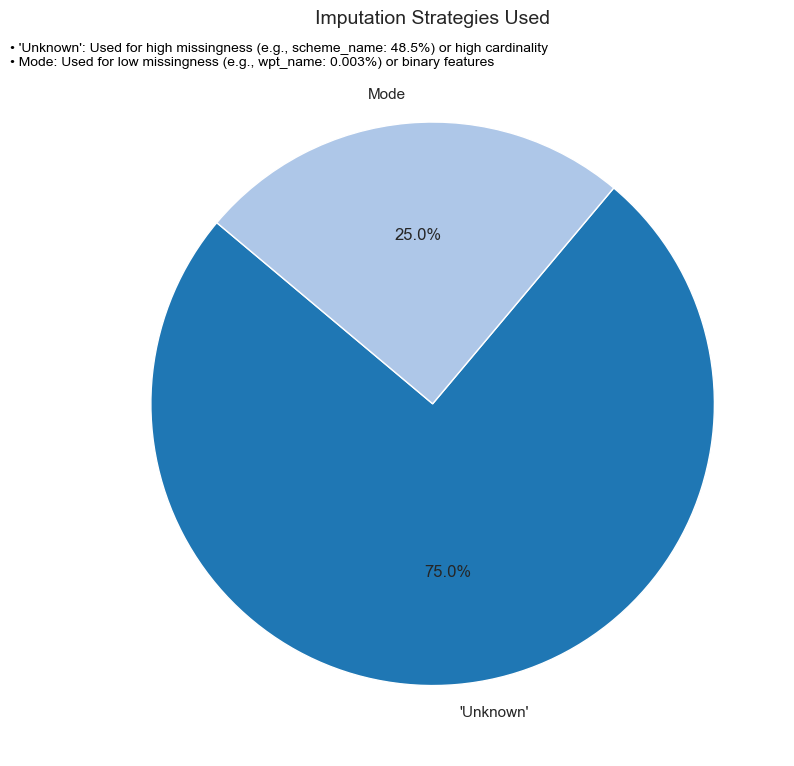

In [274]:
# Plot 2: Pie Chart for Imputation Strategy Distribution
strategy_counts = {
    "'Unknown'": 6,  # scheme_name, funder, installer, subvillage, scheme_management, permit
    "Mode": 2       # wpt_name, public_meeting
}
plt.figure(figsize=(8, 8))
plt.pie(strategy_counts.values(), labels=strategy_counts.keys(), 
        autopct='%1.1f%%', colors=['#1f77b4', '#aec7e8'], startangle=140)
plt.title('Imputation Strategies Used', fontsize=14, pad=20)

# Add annotation
plt.text(-1.5, 1.2, 
         "• 'Unknown': Used for high missingness (e.g., scheme_name: 48.5%) or high cardinality\n"
         "• Mode: Used for low missingness (e.g., wpt_name: 0.003%) or binary features", 
         fontsize=10, color='black')
plt.tight_layout()
#plt.savefig('imputation_strategy_piechart_final.png', dpi=300)  # Save for presentation
plt.show()

In [275]:


def impute_missing_values(df):
    """
    Impute missing values in specified columns of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with potential missing values.
    
    Returns:
    pd.DataFrame: DataFrame with imputed missing values.
    """
    # Create a copy to avoid modifying the original DataFrame
    df = df.copy()
    
    # Columns to impute with 'Unknown'
    unknown_cols = ['scheme_name', 'funder', 'installer', 'subvillage', 
                    'scheme_management', 'permit']
    
    # Columns to impute with mode
    mode_cols = ['wpt_name', 'public_meeting']
    
    try:
        # Impute with 'Unknown'
        for col in unknown_cols:
            if col in df.columns:
                df[col] = df[col].fillna('Unknown')
            else:
                print(f"Warning: Column '{col}' not found in DataFrame.")
        
        # Impute with mode
        for col in mode_cols:
            if col in df.columns:
                if df[col].isna().sum() > 0:
                    mode_value = df[col].mode()[0]
                    df[col] = df[col].fillna(mode_value)
                else:
                    print(f"No missing values in '{col}', skipping mode imputation.")
            else:
                print(f"Warning: Column '{col}' not found in DataFrame.")
        
        # Verify imputation
        print("\nMissing values after imputation:")
        check_cols = unknown_cols + mode_cols
        print(df[check_cols].isna().sum())
        
        return df
    
    except Exception as e:
        print(f"Error during imputation: {str(e)}")
        return df

# Example usage
# df = pd.read_csv('your_data.csv')
# df_imputed = impute_missing_values(df)

In [276]:
df = impute_missing_values(df)
#print(df.isnull().sum())

/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/3907526688.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_value)



Missing values after imputation:
scheme_name          0
funder               0
installer            0
subvillage           0
scheme_management    0
permit               0
wpt_name             0
public_meeting       0
dtype: int64


In [277]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


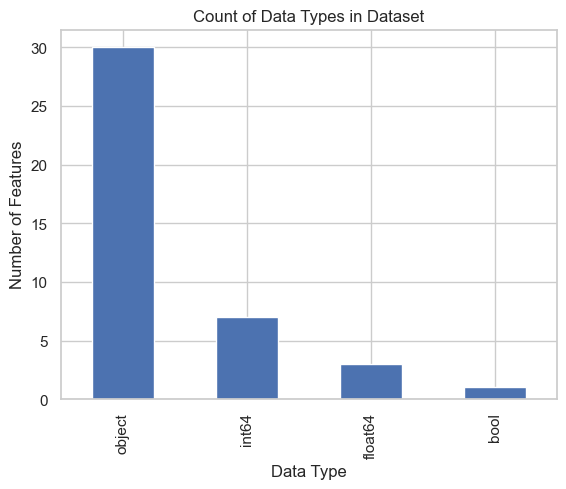

In [278]:
#datatype visulization

object_counts = df.dtypes.value_counts()
object_counts.plot(kind='bar')
plt.title('Count of Data Types in Dataset')
plt.xlabel('Data Type')
plt.ylabel('Number of Features')
#plt.savefig('Data_types_final.png', dpi=300) 
plt.show()

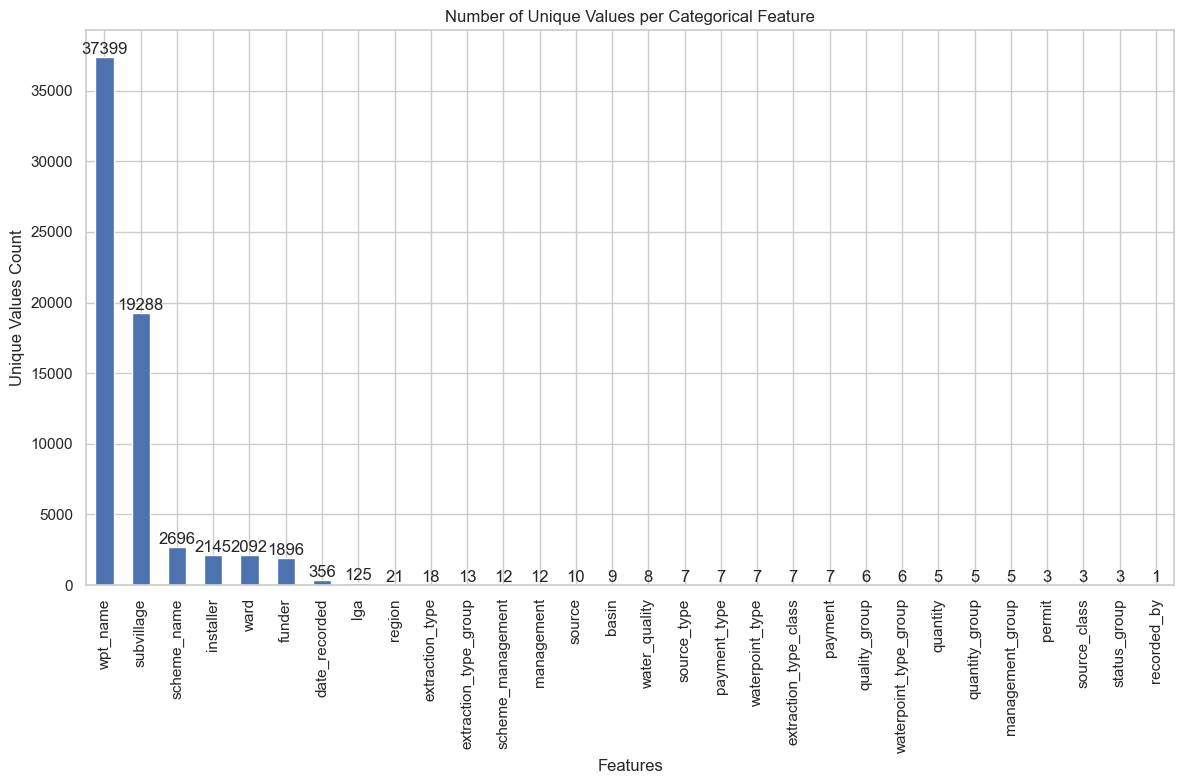

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

# Select object-type columns
object_cols = df.select_dtypes(include='object').columns

# Calculate the number of unique values for each object-type column
unique_counts = df[object_cols].nunique().sort_values(ascending=False)

# Plot the unique counts
plt.figure(figsize=(12, 8))
ax = unique_counts.plot(kind='bar')
plt.title('Number of Unique Values per Categorical Feature')
plt.xlabel('Features')
plt.ylabel('Unique Values Count')
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
#plt.savefig('unique_values_categorical_final.png', dpi=300) 
plt.show()


In [280]:
# Define encoding strategy based on cardinality
encoding_strategy = []

for col in object_cols:
    unique_count = df[col].nunique()
    if unique_count <= 10:
        encoding = 'One-Hot Encoding'
    elif unique_count <= 50:
        encoding = 'Label Encoding'
    else:
        encoding = 'Frequency or Target Encoding'
    encoding_strategy.append({'Feature': col, 'Unique Values': unique_count, 'Encoding Method': encoding})

# Create a DataFrame for visualization
encoding_df = pd.DataFrame(encoding_strategy)

# Display the DataFrame
print(encoding_df)


                  Feature  Unique Values               Encoding Method
0           date_recorded            356  Frequency or Target Encoding
1                  funder           1896  Frequency or Target Encoding
2               installer           2145  Frequency or Target Encoding
3                wpt_name          37399  Frequency or Target Encoding
4                   basin              9              One-Hot Encoding
5              subvillage          19288  Frequency or Target Encoding
6                  region             21                Label Encoding
7                     lga            125  Frequency or Target Encoding
8                    ward           2092  Frequency or Target Encoding
9             recorded_by              1              One-Hot Encoding
10      scheme_management             12                Label Encoding
11            scheme_name           2696  Frequency or Target Encoding
12                 permit              3              One-Hot Encoding
13    

In [281]:
# date_recorde
# Convert date_recorded to datetime
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
# Extract features
df['year_recorded'] = df['date_recorded'].dt.year
df['month_recorded'] = df['date_recorded'].dt.month
df['day'] = df['date_recorded'].dt.day
df['day_of_week_recorded'] = df['date_recorded'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month_year'] = df['date_recorded'].dt.to_period('M')
# Days since earliest date
earliest_date = df['date_recorded'].min()
df['days_since_recorded'] = (df['date_recorded'] - earliest_date).dt.days

In [282]:
# Verify new features
# Verify new features
print(df[['date_recorded', 'year_recorded', 'month_recorded', 'day', 'day_of_week_recorded', 'month_year', 'days_since_recorded']].head())


  date_recorded  year_recorded  month_recorded  day  day_of_week_recorded  \
0    2011-03-14           2011               3   14                     0   
1    2013-03-06           2013               3    6                     2   
2    2013-02-25           2013               2   25                     0   
3    2013-01-28           2013               1   28                     0   
4    2011-07-13           2011               7   13                     2   

  month_year  days_since_recorded  
0    2011-03                 3073  
1    2013-03                 3796  
2    2013-02                 3787  
3    2013-01                 3759  
4    2011-07                 3194  


In [283]:
#Encoding the terget columns
if 'status_group' not in df.columns:
    raise ValueError("Column 'status_group' not found in DataFrame.")

# Create a copy to avoid modifying original
df_encoded = df.copy()

# Encode status_group
le_status = LabelEncoder()
df_encoded['status_group_encoded'] = le_status.fit_transform(df_encoded['status_group'])

# Verify encoding
print("Encoded status_group sample:")
print(df_encoded[['status_group', 'status_group_encoded']].head())
print("\nLabel mapping:", dict(zip(le_status.classes_, range(len(le_status.classes_)))))

Encoded status_group sample:
     status_group  status_group_encoded
0      functional                     0
1      functional                     0
2      functional                     0
3  non functional                     2
4      functional                     0

Label mapping: {'functional': 0, 'functional needs repair': 1, 'non functional': 2}


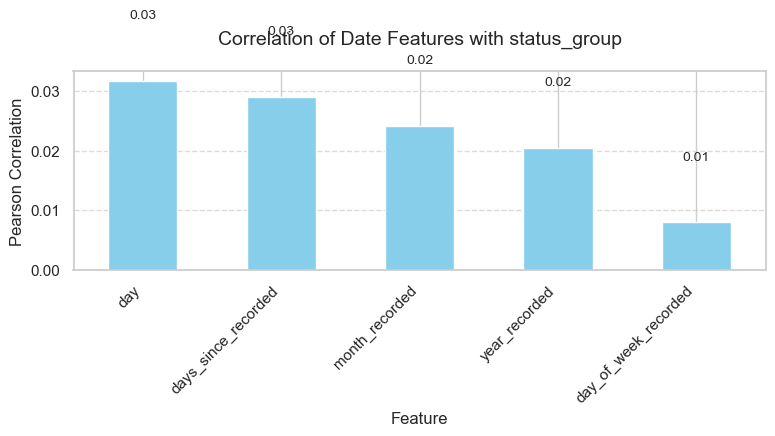


Correlations with status_group_encoded:
day                     0.031677
days_since_recorded     0.028992
month_recorded          0.024079
year_recorded           0.020372
day_of_week_recorded    0.007940
dtype: float64


In [284]:
# Select numeric date features
features = [
    'year_recorded', 'month_recorded', 'day', 
    'day_of_week_recorded', 'days_since_recorded'
]

# Check if features exist
missing_features = [f for f in features if f not in df_encoded.columns]
if missing_features:
    raise ValueError(f"Features {missing_features} not found in DataFrame.")

# Compute correlations with status_group_encoded
correlations = df_encoded[features].corrwith(df_encoded['status_group_encoded'], method='pearson')

# Plot: Bar Plot of Correlations
plt.figure(figsize=(8, 5))
correlations.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlation of Date Features with status_group', fontsize=14, pad=20)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Pearson Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Annotate bars
for i, val in enumerate(correlations.sort_values(ascending=False)):
    plt.text(i, val + (0.01 if val >= 0 else -0.02), f'{val:.2f}', 
             ha='center', va='bottom' if val >= 0 else 'top', fontsize=10)

plt.tight_layout()
#plt.savefig('date_features_status_group_correlations.png', dpi=300)  # Save for presentation
plt.show()

# Print correlations
print("\nCorrelations with status_group_encoded:")
print(correlations.sort_values(ascending=False))

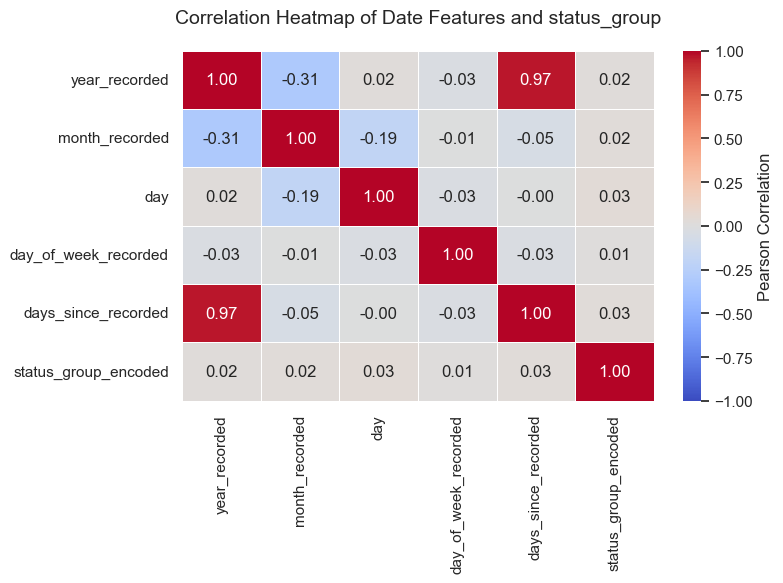


Correlations with status_group_encoded:
status_group_encoded    1.000000
day                     0.031677
days_since_recorded     0.028992
month_recorded          0.024079
year_recorded           0.020372
day_of_week_recorded    0.007940
Name: status_group_encoded, dtype: float64


In [285]:
# Select numeric date features and target
features = [
    'year_recorded', 'month_recorded', 'day', 
    'day_of_week_recorded', 'days_since_recorded'
]
target = 'status_group_encoded'

# Check if features and target exist
missing_features = [f for f in features + [target] if f not in df_encoded.columns]
if missing_features:
    raise ValueError(f"Features or target {missing_features} not found in DataFrame.")

# Compute correlation matrix
corr_matrix = df_encoded[features + [target]].corr(method='pearson')

# Plot: Heatmap of Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Pearson Correlation'})
plt.title('Correlation Heatmap of Date Features and status_group', fontsize=14, pad=20)
plt.tight_layout()
#plt.savefig('date_features_status_group_heatmap.png', dpi=300)  # Save for presentation
plt.show()

# Print correlations with status_group_encoded
print("\nCorrelations with status_group_encoded:")
print(corr_matrix[target].sort_values(ascending=False))

/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/1318763972.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P-value', y='Feature', data=chi2_df.sort_values('P-value'), palette='Blues_d')


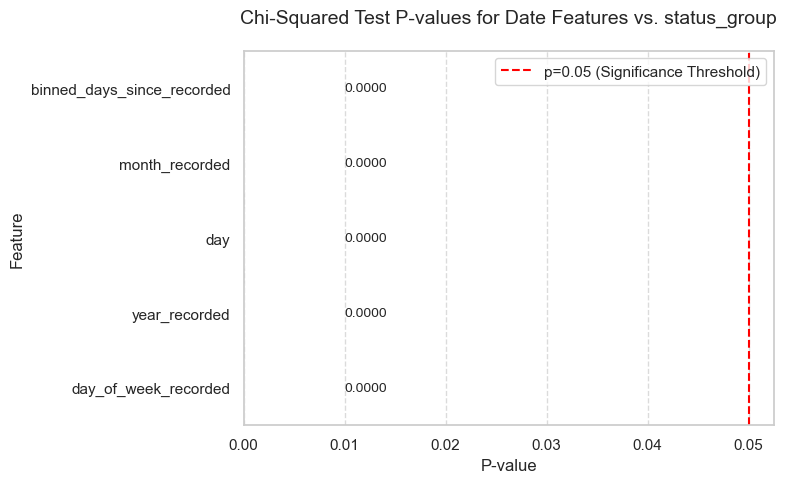


Chi-Squared Test Results:
                      Feature  Chi2 Statistic        P-value  \
4  binned_days_since_recorded     1915.228389   0.000000e+00   
1              month_recorded     1359.441120  3.724601e-274   
2                         day      539.669597   2.610366e-78   
0               year_recorded      321.851969   9.132323e-65   
3        day_of_week_recorded       54.383900   2.333324e-07   

   Degrees of Freedom  
4                  18  
1                  22  
2                  60  
0                   8  
3                  12  


In [286]:
#Chi-Squared Tests
# Select date features
features = [
    'year_recorded', 'month_recorded', 'day', 
    'day_of_week_recorded', 'days_since_recorded'
]

# Check if features and status_group exist
missing_cols = [f for f in features + ['status_group'] if f not in df.columns]
if missing_cols:
    raise ValueError(f"Columns {missing_cols} not found in DataFrame.")

# Initialize results
chi2_results = []
# Perform chi-squared test for each feature
for feature in features:
    # Create contingency table
    # For days_since_recorded, bin to reduce unique values
    if feature == 'days_since_recorded':
        df['binned_days'] = pd.qcut(df[feature], q=10, duplicates='drop')  # 10 bins
        contingency_table = pd.crosstab(df['binned_days'], df['status_group'])
    else:
        contingency_table = pd.crosstab(df[feature], df['status_group'])
    
    # Compute chi-squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    chi2_results.append({
        'Feature': feature if feature != 'days_since_recorded' else 'binned_days_since_recorded',
        'Chi2 Statistic': chi2_stat,
        'P-value': p_value,
        'Degrees of Freedom': dof
    })
    # Convert results to DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Plot: Bar Plot of P-values
plt.figure(figsize=(8, 5))
sns.barplot(x='P-value', y='Feature', data=chi2_df.sort_values('P-value'), palette='Blues_d')
plt.axvline(x=0.05, color='red', linestyle='--', label='p=0.05 (Significance Threshold)')
plt.title('Chi-Squared Test P-values for Date Features vs. status_group', fontsize=14, pad=20)
plt.xlabel('P-value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with p-values
for i, row in chi2_df.sort_values('P-value').iterrows():
    plt.text(row['P-value'] + 0.01, i, f'{row["P-value"]:.4f}', 
             va='center', fontsize=10)

plt.tight_layout()
#plt.savefig('chi_squared_p_values.png', dpi=300)  # Save for presentation
plt.show()

# Print results
print("\nChi-Squared Test Results:")
print(chi2_df.sort_values('P-value')[['Feature', 'Chi2 Statistic', 'P-value', 'Degrees of Freedom']])

/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/2925590509.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P-value', y='Feature', data=chi2_df.sort_values('P-value'), palette='Blues_d')


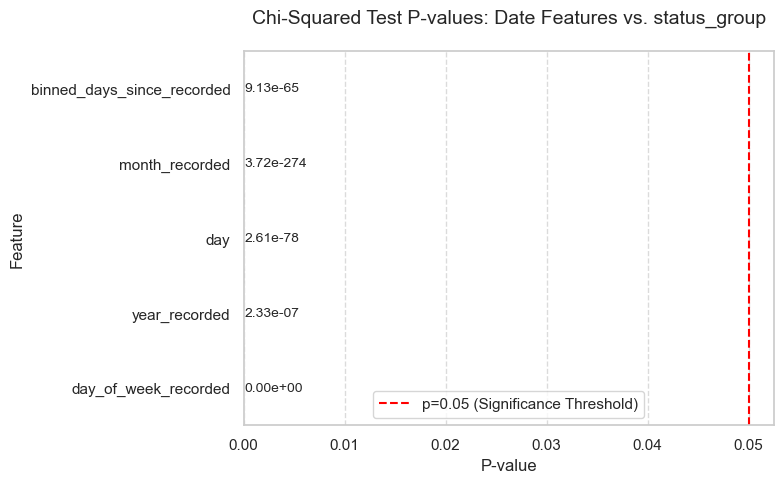


Chi-Squared Test Results:
                      Feature  Chi2 Statistic        P-value  \
4  binned_days_since_recorded     1915.228389   0.000000e+00   
1              month_recorded     1359.441120  3.724601e-274   
2                         day      539.669597   2.610366e-78   
0               year_recorded      321.851969   9.132323e-65   
3        day_of_week_recorded       54.383900   2.333324e-07   

   Degrees of Freedom  
4                  18  
1                  22  
2                  60  
0                   8  
3                  12  


In [287]:
# Select date features
features = [
    'year_recorded', 'month_recorded', 'day', 
    'day_of_week_recorded', 'days_since_recorded'
]

# Check if features and status_group exist
missing_cols = [f for f in features + ['status_group'] if f not in df.columns]
if missing_cols:
    raise ValueError(f"Columns {missing_cols} not found in DataFrame.")

# Initialize results
chi2_results = []

# Perform chi-squared test for each feature
for feature in features:
    # Create contingency table
    if feature == 'days_since_recorded':
        df['binned_days'] = pd.qcut(df[feature], q=10, duplicates='drop')  # 10 bins
        contingency_table = pd.crosstab(df['binned_days'], df['status_group'])
        feature_name = 'binned_days_since_recorded'
    else:
        contingency_table = pd.crosstab(df[feature], df['status_group'])
        feature_name = feature
    
    # Compute chi-squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    chi2_results.append({
        'Feature': feature_name,
        'Chi2 Statistic': chi2_stat,
        'P-value': p_value,
        'Degrees of Freedom': dof
    })
    # Convert results to DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Plot: Bar Plot of P-values
plt.figure(figsize=(8, 5))
sns.barplot(x='P-value', y='Feature', data=chi2_df.sort_values('P-value'), palette='Blues_d')
plt.axvline(x=0.05, color='red', linestyle='--', label='p=0.05 (Significance Threshold)')
plt.title('Chi-Squared Test P-values: Date Features vs. status_group', fontsize=14, pad=20)
plt.xlabel('P-value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with p-values
for i, row in chi2_df.sort_values('P-value').iterrows():
    plt.text(row['P-value'] + 0.0001, i, f'{row["P-value"]:.2e}', 
             va='center', fontsize=10)

plt.tight_layout()
#plt.savefig('chi_squared_p_values.png', dpi=300)  # Save for presentation
plt.show()

# Print results for reference
print("\nChi-Squared Test Results:")
print(chi2_df.sort_values('P-value')[['Feature', 'Chi2 Statistic', 'P-value', 'Degrees of Freedom']])

<Figure size 1000x600 with 0 Axes>

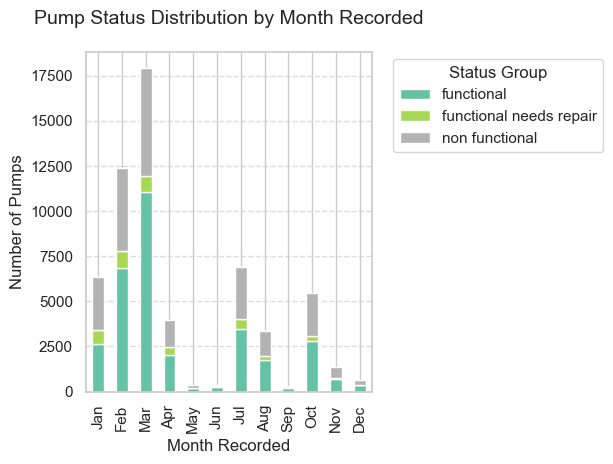


Pump Status Counts by Month:
status_group    functional  functional needs repair  non functional
month_recorded                                                     
Jan                   2609                      807            2938
Feb                   6847                      934            4621
Mar                  11058                      900            5978
Apr                   2050                      438            1482
May                    202                       10             124
Jun                    270                        9              67
Jul                   3475                      549            2904
Aug                   1719                      253            1392
Sep                    214                       10             104
Oct                   2784                      316            2366
Nov                    666                       70             613
Dec                    365                       21             235


In [288]:
# Check if required columns exist
required_cols = ['month_recorded', 'status_group']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    raise ValueError(f"Columns {missing_cols} not found in DataFrame.")

# Create a contingency table of month_recorded vs. status_group
month_status_counts = pd.crosstab(df['month_recorded'], df['status_group'])

# Map month numbers to names for readability
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
month_status_counts.index = month_status_counts.index.map(month_names)

# Plot: Stacked Bar Plot
plt.figure(figsize=(10, 6))
month_status_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Pump Status Distribution by Month Recorded', fontsize=14, pad=20)
plt.xlabel('Month Recorded', fontsize=12)
plt.ylabel('Number of Pumps', fontsize=12)
plt.legend(title='Status Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('month_status_distribution.png', dpi=300, bbox_inches='tight')  # Save for presentation
plt.show()

# Print counts for reference
print("\nPump Status Counts by Month:")
print(month_status_counts)

In [289]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 59400 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              59400 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59400 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [290]:
df.drop(columns=['date_recorded', 'month_year'], inplace=True)


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     59400 non-null  int64   
 1   amount_tsh             59400 non-null  float64 
 2   funder                 59400 non-null  object  
 3   gps_height             59400 non-null  int64   
 4   installer              59400 non-null  object  
 5   longitude              59400 non-null  float64 
 6   latitude               59400 non-null  float64 
 7   wpt_name               59400 non-null  object  
 8   num_private            59400 non-null  int64   
 9   basin                  59400 non-null  object  
 10  subvillage             59400 non-null  object  
 11  region                 59400 non-null  object  
 12  region_code            59400 non-null  int64   
 13  district_code          59400 non-null  int64   
 14  lga                    59400 non-null 

In [292]:
df.region.isnull().sum()

0

In [293]:
df.groupby(['year_recorded', 'status_group']).size().unstack(fill_value=0)


status_group,functional,functional needs repair,non functional
year_recorded,,,
2002,1,0,0
2004,10,1,19
2011,16220,1812,10642
2012,3126,362,2936
2013,12902,2142,9227


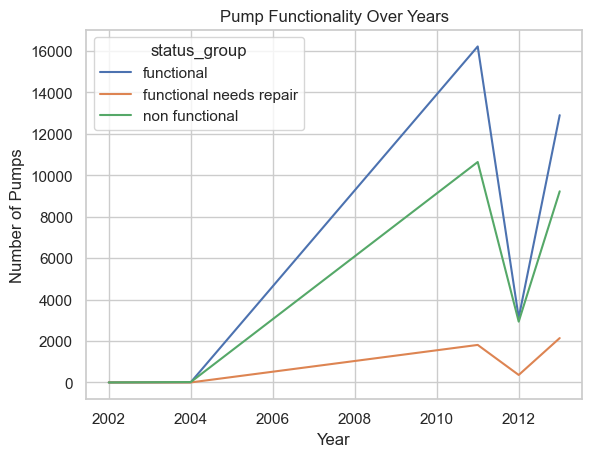

In [294]:

status_over_time = df.groupby(['year_recorded', 'status_group']).size().unstack(fill_value=0)
status_over_time.plot(kind='line')
plt.title('Pump Functionality Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Pumps')
#plt.savefig('pumps status over years')
plt.show()


In [295]:
df.year_recorded.unique()

array([2011, 2013, 2012, 2004, 2002], dtype=int32)

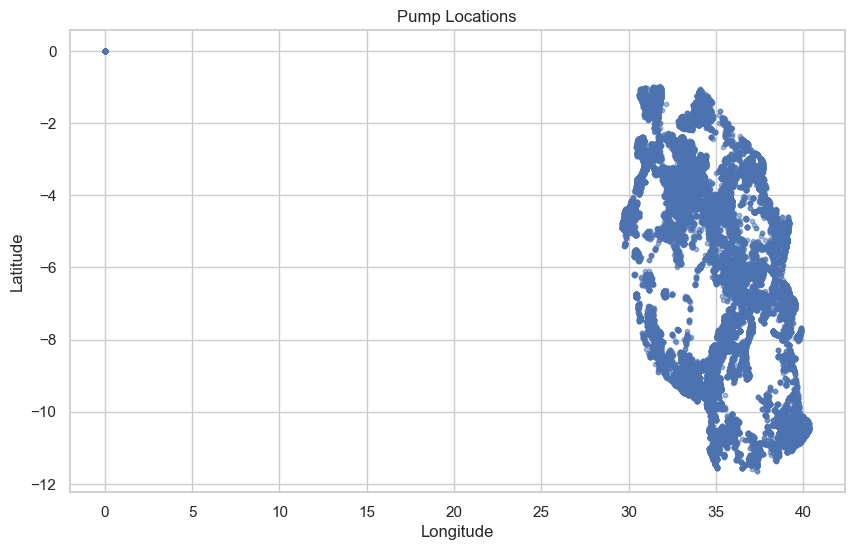

In [296]:


plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, s=10)
plt.title('Pump Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/2026469808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['longitude'], y=df['latitude'], cmap="Reds", shade=True, bw_adjust=0.5)


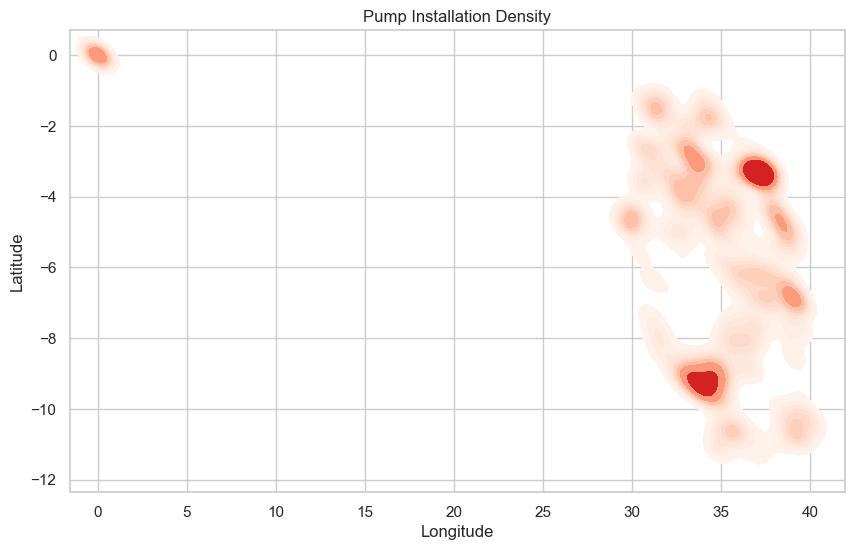

In [297]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['longitude'], y=df['latitude'], cmap="Reds", shade=True, bw_adjust=0.5)
plt.title('Pump Installation Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Pump installation density')
plt.show()

In [298]:
from sklearn.cluster import DBSCAN


coords = df[['latitude', 'longitude']].to_numpy()
kms_per_radian = 6371.0088
epsilon = 10 / kms_per_radian  # 10 km radius

db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
df['cluster'] = db.labels_


In [299]:
df['cluster'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        -1,  26,  27, 140,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44, 126,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  95,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 155, 150, 151, 152, 193,
       153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 204, 174, 175, 205, 17

In [300]:
df['cluster'].value_counts().sort_values(ascending=False)


cluster
2      13080
9       8932
5       7522
13      3242
6       2728
       ...  
47         5
197        5
206        5
199        5
203        5
Name: count, Length: 208, dtype: int64

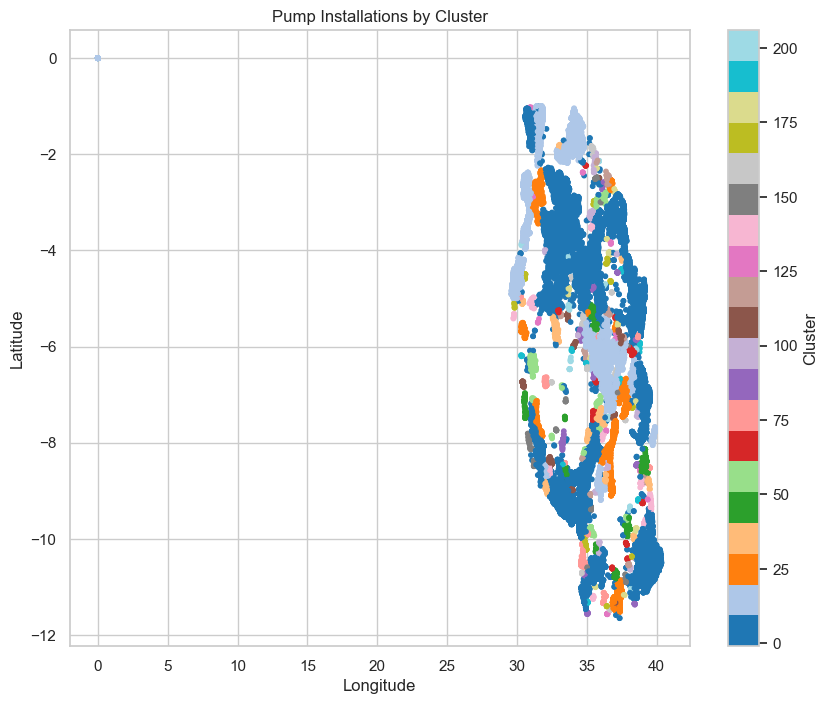

In [301]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='tab20', s=10)
plt.title('Pump Installations by Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Cluster')
#plt.savefig('pump installation by cluster')
plt.show()

In [302]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


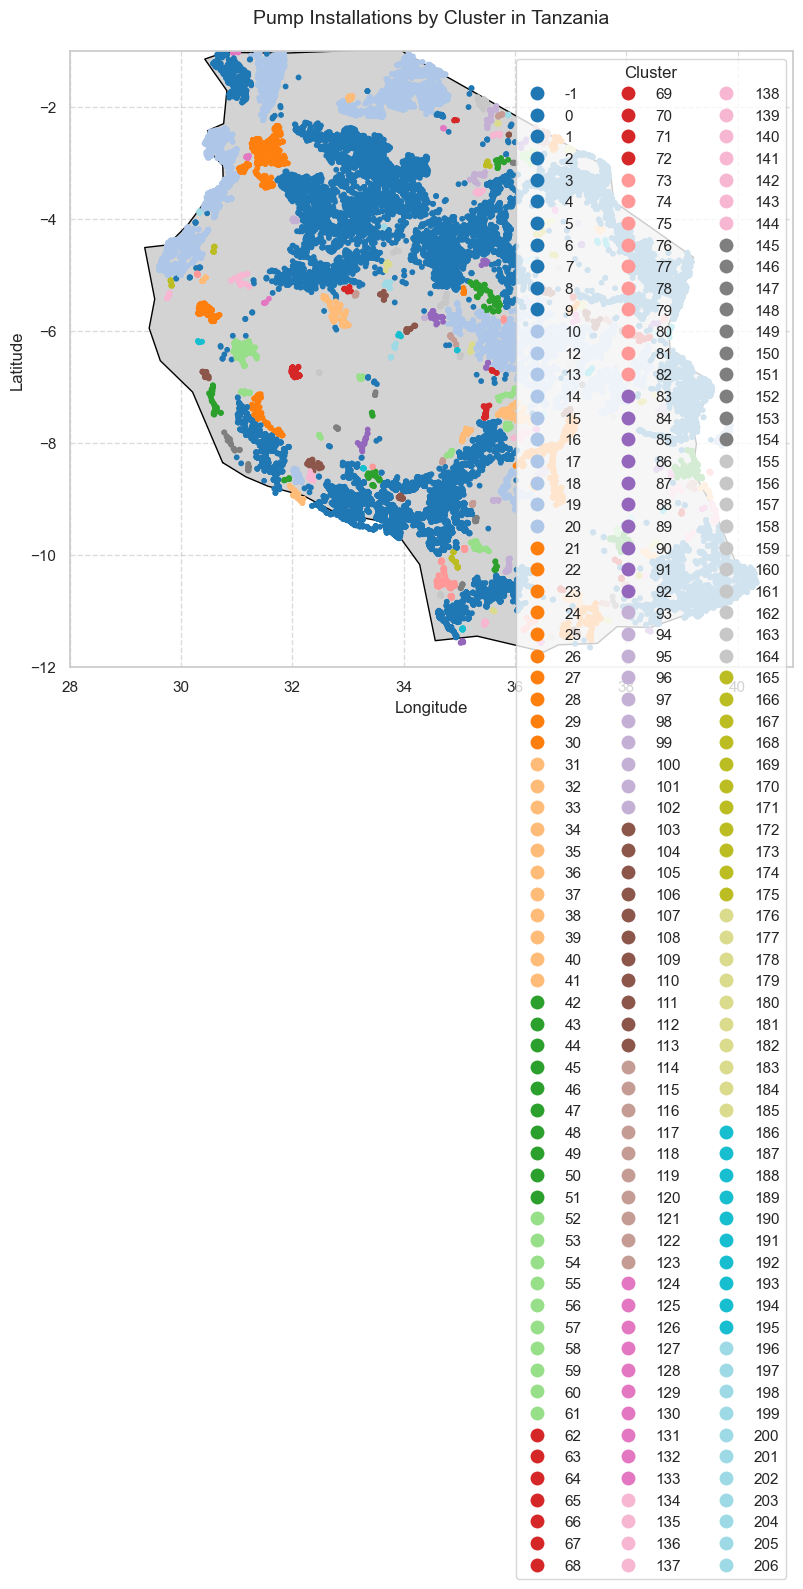

Total wells plotted: 57588 (after removing invalid coordinates)
Clusters represented: 207


In [303]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import requests
import zipfile
import io
import os

# Create directory for data if it doesn't exist
os.makedirs('data/natural_earth', exist_ok=True)

# Step 1: Download Natural Earth data
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
zip_path = "data/natural_earth/ne_110m_admin_0_countries.zip"
shp_path = "data/natural_earth/ne_110m_admin_0_countries.shp"

# Download if not already present
if not os.path.exists(shp_path):
    print("Downloading Natural Earth data...")
    r = requests.get(url)
    if r.status_code != 200:
        raise ValueError(f"Failed to download data. Status code: {r.status_code}")
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("data/natural_earth")

# Step 2: Load Tanzania map
world = gpd.read_file(shp_path)
tanzania = world[world['NAME'] == 'Tanzania']

# Step 3: Verify or create clusters in df
if 'cluster' not in df.columns:
    # Prepare coordinates
    coords = df[['longitude', 'latitude']].copy()
    # Replace invalid coordinates with NaN
    coords.loc[(coords['longitude'] == 0) | (coords['latitude'] == 0)] = np.nan
    # Drop NaNs for clustering
    coords_valid = coords.dropna()
    # Fit K-means (10 clusters as in your original plot)
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(coords_valid)
    # Assign clusters (NaN for invalid coordinates)
    df['cluster'] = np.nan
    valid_indices = coords_valid.index
    df.loc[valid_indices, 'cluster'] = kmeans.predict(coords_valid)

# Step 4: Filter out invalid coordinates for plotting
df_valid = df[(df['longitude'] != 0) & (df['latitude'] != 0)].copy()

# Step 5: Convert DataFrame to GeoDataFrame for plotting
geometry = gpd.points_from_xy(df_valid['longitude'], df_valid['latitude'])
gdf = gpd.GeoDataFrame(df_valid, geometry=geometry, crs="EPSG:4326")

# Step 6: Plot Tanzania map with points
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted width to accommodate legend

# Plot Tanzania map
tanzania.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot pump locations, colored by cluster
# Use 'ncols' in legend_kwds to create a multi-column legend
gdf.plot(ax=ax, column='cluster', cmap='tab20', markersize=10, categorical=True, legend=True, 
         legend_kwds={'title': "Cluster", 'loc': 'upper right', 'ncol': 3})

# Set title and labels
plt.title('Pump Installations by Cluster in Tanzania', fontsize=14, pad=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Set axis limits to focus on Tanzania
ax.set_xlim(28, 41)  # Longitude range for Tanzania
ax.set_ylim(-12, -1)  # Latitude range for Tanzania

# Add grid for readability
ax.grid(True, linestyle='--', alpha=0.7)

# Save and show plot
#plt.savefig('pump_installations_tanzania_map.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary for reference
print(f"Total wells plotted: {len(df_valid)} (after removing invalid coordinates)")
print(f"Clusters represented: {df_valid['cluster'].nunique()}")

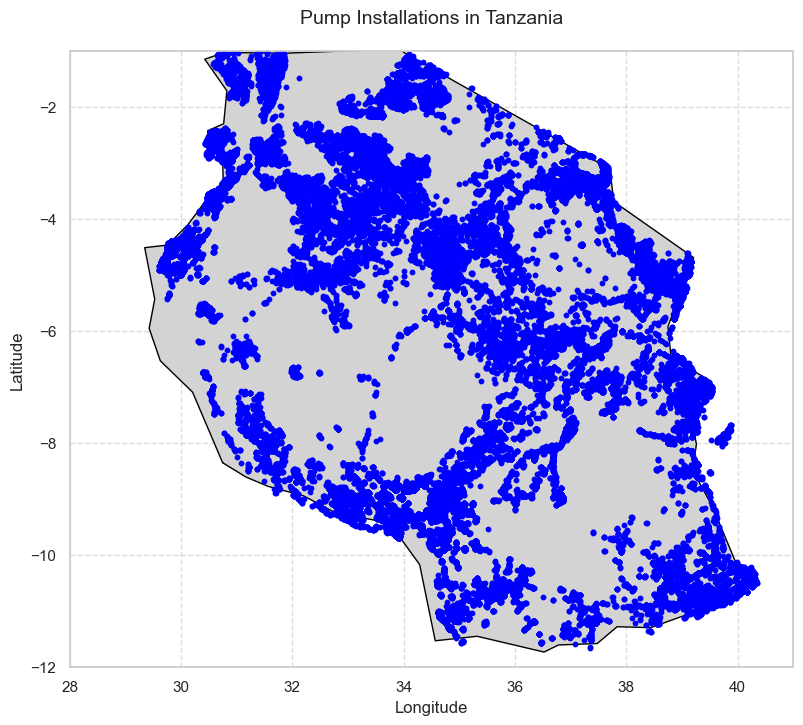

Total wells plotted: 57588 (after removing invalid coordinates)


In [304]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import os

# Create directory for data if it doesn't exist
os.makedirs('data/natural_earth', exist_ok=True)

# Step 1: Download Natural Earth data
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
zip_path = "data/natural_earth/ne_110m_admin_0_countries.zip"
shp_path = "data/natural_earth/ne_110m_admin_0_countries.shp"

# Download if not already present
if not os.path.exists(shp_path):
    print("Downloading Natural Earth data...")
    r = requests.get(url)
    if r.status_code != 200:
        raise ValueError(f"Failed to download data. Status code: {r.status_code}")
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("data/natural_earth")

# Step 2: Load Tanzania map
world = gpd.read_file(shp_path)
tanzania = world[world['NAME'] == 'Tanzania']

# Step 3: Filter out invalid coordinates for plotting
df_valid = df[(df['longitude'] != 0) & (df['latitude'] != 0)].copy()

# Step 4: Convert DataFrame to GeoDataFrame for plotting
geometry = gpd.points_from_xy(df_valid['longitude'], df_valid['latitude'])
gdf = gpd.GeoDataFrame(df_valid, geometry=geometry, crs="EPSG:4326")

# Step 5: Plot Tanzania map with points
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Tanzania map
tanzania.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot pump locations (no clustering, no legend)
gdf.plot(ax=ax, color='blue', markersize=10)

# Set title and labels
plt.title('Pump Installations in Tanzania', fontsize=14, pad=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Set axis limits to focus on Tanzania
ax.set_xlim(28, 41)  # Longitude range for Tanzania
ax.set_ylim(-12, -1)  # Latitude range for Tanzania

# Add grid for readability
ax.grid(True, linestyle='--', alpha=0.7)

# Save and show plot
#plt.savefig('pump_installations_tanzania_map.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary for reference
print(f"Total wells plotted: {len(df_valid)} (after removing invalid coordinates)")

In [305]:
region_counts = df['region'].value_counts()
print(region_counts)


region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64


/var/folders/y0/f_k2yj7j4zx0212sqbg9h2x00000gn/T/ipykernel_25326/4221874579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette='Blues_d')


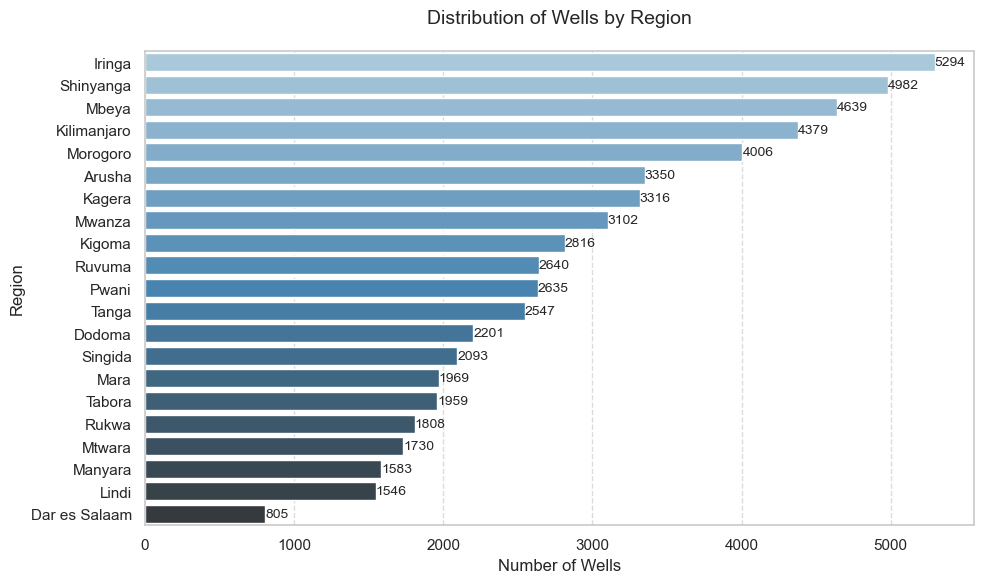

In [306]:
# Compute region counts
region_counts = df['region'].value_counts()

# Plot: Bar Plot of Region Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='Blues_d')
plt.title('Distribution of Wells by Region', fontsize=14, pad=20)
plt.xlabel('Number of Wells', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with counts
for i, count in enumerate(region_counts.values):
    plt.text(count + 0.1, i, f'{count}', va='center', fontsize=10)

plt.tight_layout()
#plt.savefig('region_distribution.png', dpi=300)  # Save for presentation
plt.show()

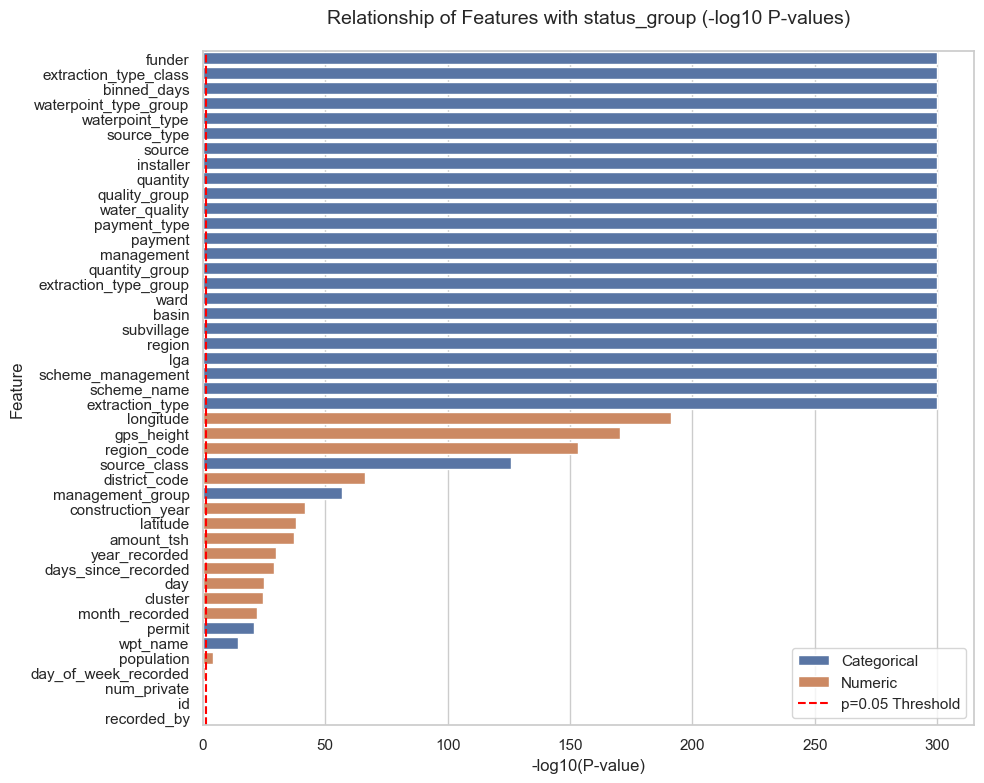


Feature Relationships with status_group (Sorted by P-value):
                  Feature         Type         Test        P-value
0                  funder  Categorical  Chi-squared   0.000000e+00
28            binned_days  Categorical  Chi-squared   0.000000e+00
27  waterpoint_type_group  Categorical  Chi-squared   0.000000e+00
26        waterpoint_type  Categorical  Chi-squared   0.000000e+00
24            source_type  Categorical  Chi-squared   0.000000e+00
23                 source  Categorical  Chi-squared   0.000000e+00
21               quantity  Categorical  Chi-squared   0.000000e+00
20          quality_group  Categorical  Chi-squared   0.000000e+00
19          water_quality  Categorical  Chi-squared   0.000000e+00
18           payment_type  Categorical  Chi-squared   0.000000e+00
17                payment  Categorical  Chi-squared   0.000000e+00
15             management  Categorical  Chi-squared   0.000000e+00
14  extraction_type_class  Categorical  Chi-squared   0.000000e+00


In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway

# Step 1: Prepare the data
# Ensure status_group is categorical
if df['status_group'].dtype != 'object':
    df['status_group'] = df['status_group'].astype(str)

# Identify numeric and categorical features (excluding status_group)
features = [col for col in df.columns if col != 'status_group']
numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df[features].select_dtypes(include=['object', 'category']).columns.tolist()

# Step 2: Analyze relationships
results = []

# Chi-squared test for categorical features
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['status_group'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    results.append({
        'Feature': feature,
        'Type': 'Categorical',
        'Test': 'Chi-squared',
        'P-value': p_value
    })

# ANOVA for numeric features
for feature in numeric_features:
    # Group data by status_group
    groups = [df[feature][df['status_group'] == label] for label in df['status_group'].unique()]
    # Remove NaNs
    groups = [group.dropna() for group in groups]
    # Perform ANOVA
    if all(len(group) > 0 for group in groups):  # Ensure no empty groups
        f_stat, p_value = f_oneway(*groups)
        results.append({
            'Feature': feature,
            'Type': 'Numeric',
            'Test': 'ANOVA',
            'P-value': p_value
        })
    else:
        results.append({
            'Feature': feature,
            'Type': 'Numeric',
            'Test': 'ANOVA',
            'P-value': np.nan
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Step 3: Visualize p-values
plt.figure(figsize=(10, 8))
# Use -log10(p-value) for better visualization (smaller p-values = larger bars)
results_df['NegLogP'] = -np.log10(results_df['P-value'].replace(0, 1e-300))  # Avoid log(0)
sns.barplot(x='NegLogP', y='Feature', hue='Type', data=results_df.sort_values('NegLogP', ascending=False))
plt.axvline(x=-np.log10(0.05), color='red', linestyle='--', label='p=0.05 Threshold')
plt.title('Relationship of Features with status_group (-log10 P-values)', fontsize=14, pad=20)
plt.xlabel('-log10(P-value)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend()
plt.tight_layout()
#plt.savefig('features_status_group_relationship.png', dpi=300)
plt.show()

# Print results
print("\nFeature Relationships with status_group (Sorted by P-value):")
print(results_df.sort_values('P-value')[['Feature', 'Type', 'Test', 'P-value']])

In [308]:
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,day,day_of_week_recorded,days_since_recorded,binned_days,cluster
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,communal standpipe,communal standpipe,functional,2011,3,14,0,3073,"(3068.0, 3082.0]",0
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,communal standpipe,communal standpipe,functional,2013,3,6,2,3796,"(3779.0, 3805.0]",1
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,communal standpipe multiple,communal standpipe,functional,2013,2,25,0,3787,"(3779.0, 3805.0]",2
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,communal standpipe multiple,communal standpipe,non functional,2013,1,28,0,3759,"(3747.0, 3763.0]",3
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,communal standpipe,communal standpipe,functional,2011,7,13,2,3194,"(3107.0, 3208.0]",4


In [309]:
df.isnull().sum()

id                       0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [310]:
#checking duplicate row
duplicate_rows = df[df.duplicated()]

# Count duplicate rows
print("Duplicate rows count:", duplicate_rows.shape[0])

Duplicate rows count: 0


In [311]:
#Checking duplicate columns
# Count duplicate column names
print("Duplicate column names:", df.columns.duplicated().sum())

# List duplicate column names (if any)
print(df.columns[df.columns.duplicated()])

Duplicate column names: 0
Index([], dtype='object')


In [312]:
df.isnull().sum()

id                       0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [313]:
'''# Separate your data
id_num = df['id']
y = df['status_group']
x = df.drop(columns=['id', 'status_group'])
for col in x:
    if col in X.columns and X[col].dtype == 'bool':
        x[col] = x[col].astype(str)'''

"# Separate your data\nid_num = df['id']\ny = df['status_group']\nx = df.drop(columns=['id', 'status_group'])\nfor col in x:\n    if col in X.columns and X[col].dtype == 'bool':\n        x[col] = x[col].astype(str)"

In [314]:
'''for col in onehot_cols:
    if col in x.columns:
        unique_types = set(type(x) for x in x[col].dropna())
        print(f"{col}: {unique_types}")'''


'for col in onehot_cols:\n    if col in x.columns:\n        unique_types = set(type(x) for x in x[col].dropna())\n        print(f"{col}: {unique_types}")'

In [315]:
'''id_num = df['id']
y = df['status_group']
x = df.drop(columns=['id', 'status_group'])
# Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Your full column lists (replace with your actual columns)
freq_cols = ['funder', 'installer', 'wpt_name', 'subvillage', 'ward', 'lga', 'scheme_name']
onehot_cols = ['basin', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_class',
               'management', 'management_group', 'payment', 'payment_type', 'water_quality',
               'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
               'source_class', 'waterpoint_type', 'waterpoint_type_group']
label_cols = ['region', 'recorded_by', 'extraction_type_group']
numeric_cols = ['gps_height', 'longitude', 'latitude', 'population', 'construction_year']
#freq_cols.remove('date_recorded')
# Convert all onehot columns to string (to avoid mixed types)
for col in onehot_cols:
    if col in x.columns:
        x[col] = x[col].astype(str)
# Frequency encoding function
def frequency_encode(X):
    X_copy = X.copy()
    for col in X.columns:
        freq = X_copy[col].value_counts(normalize=True)
        X_copy[col] = X_copy[col].map(freq)
    return X_copy

freq_encoder = FunctionTransformer(frequency_encode, validate=False)

# ColumnTransformer without imputers (since you already handled missing values)
encoding_pipeline = ColumnTransformer(transformers=[
    ('freq', freq_encoder, freq_cols),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols),
    ('label', OrdinalEncoder(), label_cols),
    ('num', 'passthrough', numeric_cols)
])'''

"id_num = df['id']\ny = df['status_group']\nx = df.drop(columns=['id', 'status_group'])\n# Encode the target\nlabel_encoder = LabelEncoder()\ny_encoded = label_encoder.fit_transform(y)\n\n# Your full column lists (replace with your actual columns)\nfreq_cols = ['funder', 'installer', 'wpt_name', 'subvillage', 'ward', 'lga', 'scheme_name']\nonehot_cols = ['basin', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_class',\n               'management', 'management_group', 'payment', 'payment_type', 'water_quality',\n               'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',\n               'source_class', 'waterpoint_type', 'waterpoint_type_group']\nlabel_cols = ['region', 'recorded_by', 'extraction_type_group']\nnumeric_cols = ['gps_height', 'longitude', 'latitude', 'population', 'construction_year']\n#freq_cols.remove('date_recorded')\n# Convert all onehot columns to string (to avoid mixed types)\nfor col in onehot_cols:\n    if col in x.colu

In [326]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# Assume your df is already loaded

# 1. Separate your data
id_num = df['id']
y = df['status_group']
x = df.drop(columns=['id', 'status_group'])

# 2. Convert bool columns in onehot_cols to str to avoid errors
onehot_cols = ['basin', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_class',
               'management', 'management_group', 'payment', 'payment_type', 'water_quality',
               'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
               'source_class', 'waterpoint_type', 'waterpoint_type_group']

for col in onehot_cols:
    if col in x.columns:
        x[col] = x[col].astype(str)

# 3. Define your columns for encoding
freq_cols = ['funder', 'installer', 'wpt_name', 'subvillage', 'ward', 'lga', 'scheme_name']
label_cols = ['region', 'recorded_by', 'extraction_type_group']
numeric_cols = ['gps_height', 'longitude', 'latitude', 'population', 'construction_year']

# Frequency encoding function
def frequency_encode(X):
    X_copy = X.copy()
    for col in X_copy.columns:
        freq = X_copy[col].value_counts(normalize=True)
        X_copy[col] = X_copy[col].map(freq)
    return X_copy

freq_encoder = FunctionTransformer(frequency_encode, validate=False)

# 4. Create encoding pipeline
encoding_pipeline = ColumnTransformer(transformers=[
    ('freq', freq_encoder, freq_cols),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols),
    ('label', OrdinalEncoder(), label_cols),
    ('num', StandardScaler(), numeric_cols)
    #('num', 'passthrough', numeric_cols)
])

# 5. Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 6. Fit-transform features
X_encoded = encoding_pipeline.fit_transform(x)

# 7. Build column names for the encoded DataFrame

# Extract individual transformers
freq_col_names = freq_cols
onehot_encoder = encoding_pipeline.named_transformers_['onehot']
onehot_col_names = onehot_encoder.get_feature_names_out(onehot_cols)
label_col_names = label_cols
numeric_col_names = numeric_cols

# Combine all column names (order matters)
all_col_names = np.concatenate([freq_col_names, onehot_col_names, label_col_names, numeric_col_names])

# 8. Convert X_encoded back to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=all_col_names)

# 9. Convert y_encoded to DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns=['status_group_encoded'])

# 10. (Optional) Convert encoded y back to original labels
y_original = label_encoder.inverse_transform(y_encoded)

# Now you have:
# - X_encoded_df: features encoded with proper columns
# - y_encoded_df: target encoded as numbers
# - y_original: target labels in original string format




In [327]:
X_encoded_df.head()

,funder,installer,wpt_name,subvillage,ward,lga,scheme_name,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,...,waterpoint_type_group_improved spring,waterpoint_type_group_other,region,recorded_by,extraction_type_group,gps_height,longitude,latitude,population,construction_year
0,0.004630,0.001582,0.060017,0.000101,0.000606,0.009495,0.002340,0.0,1.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.041252,0.131052,-1.408791,-0.150399,0.733857
1,0.000892,0.000657,0.013973,0.000084,0.001195,0.012054,0.485017,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,1.0,1.054237,0.094610,1.207934,0.212290,0.745416
2,0.000135,0.006869,0.000051,0.008451,0.000168,0.005185,0.000152,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,1.0,0.025541,0.515158,0.639751,0.148660,0.744365
3,0.017795,0.003737,0.000017,0.000286,0.000539,0.002660,0.485017,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,10.0,-0.584751,0.671308,-1.849720,-0.258570,0.720196
4,0.000017,0.002273,0.029428,0.000034,0.000219,0.012980,0.485017,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,1.0,-0.964200,-0.448669,1.317271,-0.381587,-1.366788


In [328]:
y_encoded_df.head()

,status_group_encoded
0,0
1,0
2,0
3,2
4,0


In [332]:
#Build and Train Random Forest Model
# Build the full pipeline with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


model_pipeline = Pipeline(steps=[
    ('encoding', encoding_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



                         precision    recall  f1-score   support

             functional       0.80      0.90      0.85      6457
functional needs repair       0.58      0.30      0.39       851
         non functional       0.84      0.77      0.81      4572

               accuracy                           0.81     11880
              macro avg       0.74      0.66      0.68     11880
           weighted avg       0.80      0.81      0.80     11880



In [333]:
from sklearn.utils.class_weight import compute_class_weight

# Compute weights
weights = compute_class_weight(class_weight='balanced',
                                classes=np.unique(y_encoded),
                                y=y_encoded)
model_pipeline = Pipeline(steps=[
    ('encoding', encoding_pipeline),
    ('classifier', RandomForestClassifier(class_weight={i: w for i, w in enumerate(weights)}))
])
# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                         precision    recall  f1-score   support

             functional       0.80      0.91      0.85      6457
functional needs repair       0.62      0.30      0.40       851
         non functional       0.86      0.77      0.81      4572

               accuracy                           0.81     11880
              macro avg       0.76      0.66      0.69     11880
           weighted avg       0.81      0.81      0.80     11880



In [334]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('encoding',
                                        ColumnTransformer(transformers=[('freq',
                                                                         FunctionTransformer(func=<function frequency_encode at 0x308f44f40>),
                                                                         ['funder',
                                                                          'installer',
                                                                          'wpt_name',
                                                                          'subvillage',
                                                                          'ward',
                                                                          'lga',
                                                                          'scheme_name']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['basin',
                                                                          'scheme_management',
                                                                          'permit',
                                                                          'extra...
                                                                         StandardScaler(),
                                                                         ['gps_height',
                                                                          'longitude',
                                                                          'latitude',
                                                                          'population',
                                                                          'construction_year'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight={0: 0.6137822003161908,
                                                                             1: 4.586518415566365,
                                                                             2: 0.8675078864353313}))]),
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1_weighted')

In [335]:
print("Best Params:", grid_search.best_params_)

Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


In [336]:
print("Best F1 Score:", grid_search.best_score_)

Best F1 Score: 0.7905202144003839


!pip install xgboost 



In [339]:
from xgboost import XGBClassifier


In [340]:
xgb_pipeline = Pipeline(steps=[
    ('encoding', encoding_pipeline),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


/Users/gmarifulislam/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:26:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance:
                         precision    recall  f1-score   support

             functional       0.76      0.91      0.83      6457
functional needs repair       0.59      0.21      0.31       851
         non functional       0.84      0.71      0.77      4572

               accuracy                           0.78     11880
              macro avg       0.73      0.61      0.64     11880
           weighted avg       0.78      0.78      0.77     11880



In [341]:
!pip install catboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/ae/48/f1d7b4b37f9e56ce6b2c0471465d6877fb475e0ac9cf1bc463517b2f4a82/catboost-1.2.8-cp311-cp311-macosx_11_0_universal2.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 8.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.7 MB/s eta 0:00:00


In [342]:
from catboost import CatBoostClassifier
cat_pipeline = Pipeline(steps=[
    ('encoding', encoding_pipeline),
    ('classifier', CatBoostClassifier(verbose=0, random_state=42))
])

cat_pipeline.fit(X_train, y_train)
y_pred_cat = cat_pipeline.predict(X_test)
print("CatBoost Performance:")
print(classification_report(y_test, y_pred_cat, target_names=label_encoder.classes_))


CatBoost Performance:
                         precision    recall  f1-score   support

             functional       0.77      0.91      0.83      6457
functional needs repair       0.64      0.23      0.33       851
         non functional       0.83      0.72      0.77      4572

               accuracy                           0.79     11880
              macro avg       0.75      0.62      0.65     11880
           weighted avg       0.78      0.79      0.77     11880



In [343]:
from sklearn.ensemble import GradientBoostingClassifier
gb_pipeline = Pipeline(steps=[
    ('encoding', encoding_pipeline),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

from sklearn.metrics import classification_report
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_))


Gradient Boosting Performance:
                         precision    recall  f1-score   support

             functional       0.72      0.93      0.81      6457
functional needs repair       0.43      0.08      0.14       851
         non functional       0.84      0.62      0.71      4572

               accuracy                           0.75     11880
              macro avg       0.66      0.54      0.55     11880
           weighted avg       0.74      0.75      0.72     11880

